## Imports

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.optimize import minimize

## The Data

In [28]:
advertising_df = pd.read_csv("Advertising_Budget_and_Sales.csv")

In [29]:
advertising_df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## EDA

In [30]:
advertising_df = advertising_df.drop(columns="Unnamed: 0")

In [31]:
advertising_df.describe()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [32]:
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV Ad Budget ($)         200 non-null    float64
 1   Radio Ad Budget ($)      200 non-null    float64
 2   Newspaper Ad Budget ($)  200 non-null    float64
 3   Sales ($)                200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


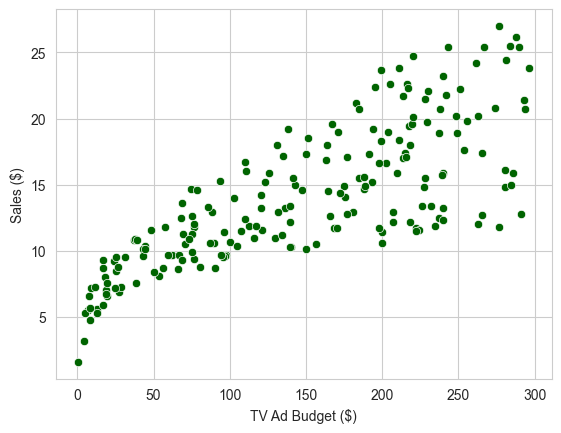

In [33]:
sns.set_style("whitegrid")
sns.scatterplot(
    data=advertising_df,
    x="TV Ad Budget ($)",
    y="Sales ($)",
    color="darkgreen"
)
plt.show()

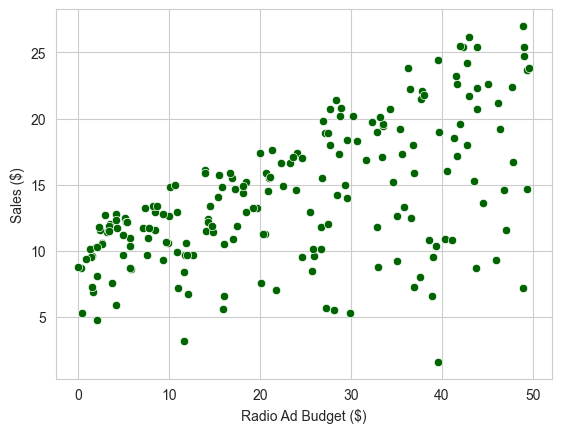

In [34]:
sns.scatterplot(
    data=advertising_df,
    x="Radio Ad Budget ($)",
    y="Sales ($)",
    color="darkgreen"
)
plt.show()

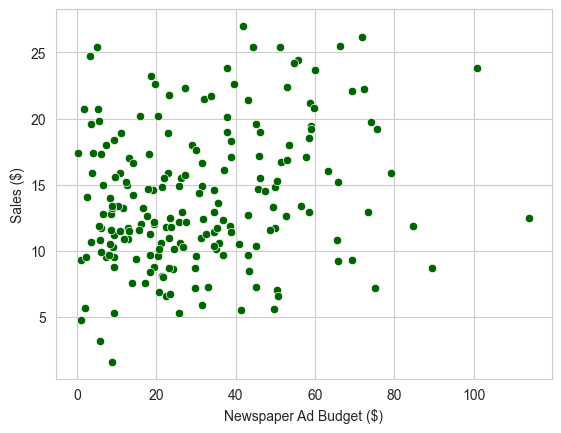

In [35]:
sns.scatterplot(
    data=advertising_df,
    x="Newspaper Ad Budget ($)",
    y="Sales ($)",
    color="darkgreen"
)
plt.show()

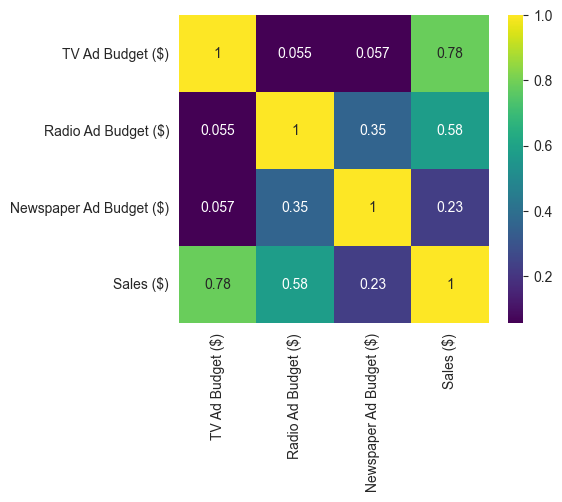

In [36]:
plt.figure(figsize=(5,4))
sns.heatmap(
    data=advertising_df.corr(),
    annot=True,
    cmap="viridis"
)
plt.show()

## Train test split

In [37]:
feature_cols = list(advertising_df.columns)
feature_cols.remove("Sales ($)")
X = advertising_df[feature_cols]
y = advertising_df["Sales ($)"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [39]:
X_train.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($)
168,215.4,23.6,57.6
112,175.7,15.4,2.4
171,164.5,20.9,47.4
181,218.5,5.4,27.4
7,120.2,19.6,11.6


## Linear Regression Model

In [40]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_preds = lr_model.predict(X_test)

In [42]:
r2_ = r2_score(y_test, y_preds)
mse_ = mean_squared_error(y_test, y_preds)
print(r2_)
print(mse_)

0.9184369032278497
1.7332927815807735


In [43]:
coefficients = lr_model.coef_
intercept = lr_model.intercept_

In [44]:
coefficients_dict = dict(zip(X.columns, coefficients))

In [45]:
coefficients_dict

{'TV Ad Budget ($)': 0.045586396923019176,
 'Radio Ad Budget ($)': 0.18569815745973386,
 'Newspaper Ad Budget ($)': 0.0022328102410188455}

## Minimize the budget given the minimum sales

### Scipy minimize

In [46]:
bounds_min = dict(X.min())
bounds_max = dict(X.max()+(0.2*X.max()))
bounds = list((bounds_min[key], bounds_max[key]) for key in bounds_min)
bounds

[(0.7, 355.67999999999995), (0.0, 59.52), (0.3, 136.8)]

In [47]:
coeffs_list = list(coefficients_dict.values())
print(coeffs_list)

[0.045586396923019176, 0.18569815745973386, 0.0022328102410188455]


In [48]:
# objective function
def objective(x):
    return intercept + (coeffs_list[0]*x[0]) + (coeffs_list[1]*x[1]) + (coeffs_list[2]*x[2])

In [49]:
def ineq_cons_minimize(x, minimum_sales):
    return objective(x) - minimum_sales

In [50]:
# Scipy minimize
def scipy_minimize(initial_guess, minimum_sales):
    result = minimize(
        fun=objective, 
        x0=initial_guess, 
        constraints={
            'type': 'ineq', 
            'fun': lambda x: ineq_cons_minimize(x, minimum_sales)
        },
        bounds=bounds
    )
    return result

In [51]:
initial_guess_x = [0, 0, 0]
minimum_sales = 20
result = scipy_minimize(initial_guess=initial_guess_x, minimum_sales=minimum_sales)

print(f"The result for the minimum sales: {result.fun}")
print(f"The x values are: {result.x}")

The result for the minimum sales: 19.999999970453274
The x values are: [134.13448885  59.52         6.83553544]


In [52]:
initial_guess_x = [0, 0, 0]
minimum_sales = 10.0
result = scipy_minimize(initial_guess=initial_guess_x, minimum_sales=minimum_sales)

print(f"The result for the minimum sales: {result.fun}")
print(f"The x values are: {result.x}")

The result for the minimum sales: 9.999999573234945
The x values are: [ 9.61379074 36.31065465  0.73660228]
